### 1. Aufgabenblatt - Graphbibliothek

1. Vorstellung der API
2. Implementierung
3. Laufzeitanalyse

In [1]:
from src.Graph import Graph
from src.printGraph import draw_graph
from src.CustomExceptions import *
import src.shortestPaths as sp

import networkx as nx
import matplotlib.pyplot as plt

In [2]:
import test_.HelperClass as Hc

Graph den wir nutzen werden:

<img src="test_/Graph_for_testing.jpg" width=400>

Knotenmenge: {'1', '0', '10', '7', '-1', '15', '3', '4', '12', '5', '13', '6', '9', '8', '2', '11'}

the Graph contains the following Nodes: -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15

The Graph contains the following Edges (Metis Format):
-1: 0
0: -1
1: 2
2: 1, 3
3: 2, 4, 5
4: 3, 5
5: 3, 4
6: 7, 8
7: 6
8: 6
10: 11, 13
11: 10, 12
12: 11, 13
13: 10, 12


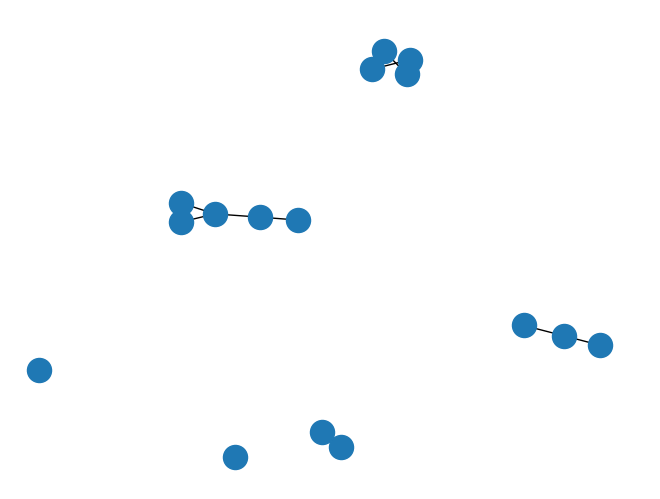

In [3]:
# Erstellung eines leeren Graphens
G, n, m = Hc.create_graph()

# Zugriff auf die Knotenmenge
nodes = G.get_nodes()
print(f"Knotenmenge: {nodes}\n")

# and pretty printing
G.print_nodes()
print("")

# print edges
G.print_edges()

# draw the Graph using networkx
draw_graph(G)

In [5]:
# von jedem Knoten kann auf seine Nachbarn zugegriffen werden
n1 = G.get_neighbors("1")
print(f"Neighbors of Node '1': {n1}")
n2 = G.get_neighbors("2")
print(f"Neighbors of Node '2': {n2}")
n3 = G.get_neighbors("5")
print(f"Neighbors of Node '5': {n3}")

# wenn der Knoten nicht existiert, dann wird eine Exception geworfen
try:
    G.get_neighbors("42")
except NodeDoesNotExistException:
    print("Node does not exist!")

Neighbors of Node '1': {'2'}
Neighbors of Node '2': {'1', '3'}
Neighbors of Node '5': {'3', '4'}
Node does not exist!


In [6]:
# teste für jeden Knoten ob sie benachbart sind
print(G.test_neighbors("1", "2"))
print(G.test_neighbors("3", "5"))
print(G.test_neighbors("4", "1"))

# Die Relation ist natürlich symmetrisch
print(G.test_neighbors("1", "4"))

# wenn der Knoten nicht existiert wird ebenfalls eine Exception geworfen
try:
    G.test_neighbors("5", "42")
except NodeDoesNotExistException:
    print("Node does not exist!")

True
True
False
False
Node does not exist!


In [7]:
# Methode die den Knotengrad für eine Methode zurückgibt
print(G.get_node_degree("4"))
print(G.get_node_degree("1"))
print(G.get_node_degree("0"))

2
1
1


In [8]:
# Knoten und Kanten können gelöscht werden
# hat der Knoten Kanten, so werden diese automatisch entfernt
G.add_node("42")
G.print_nodes()
G.remove_node("42")
G.print_nodes()
print("")

# Kanten können ebenfalls gelöscht werden
G.add_edge("9", "8")
G.print_edges()
print("")
G.remove_edge("8", "9")
G.print_edges()

the Graph contains the following Nodes: -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 42
the Graph contains the following Nodes: -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15

The Graph contains the following Edges (Metis Format):
-1: 0
0: -1
1: 2
2: 1, 3
3: 2, 4, 5
4: 3, 5
5: 3, 4
6: 7, 8
7: 6
8: 9, 6
9: 8
10: 11, 13
11: 10, 12
12: 11, 13
13: 10, 12

The Graph contains the following Edges (Metis Format):
-1: 0
0: -1
1: 2
2: 1, 3
3: 2, 4, 5
4: 3, 5
5: 3, 4
6: 7, 8
7: 6
8: 6
10: 11, 13
11: 10, 12
12: 11, 13
13: 10, 12


-1 0
1 2
2 3
3 4
3 5
4 5
6 7
6 8
10 11
10 13
11 12
12 13


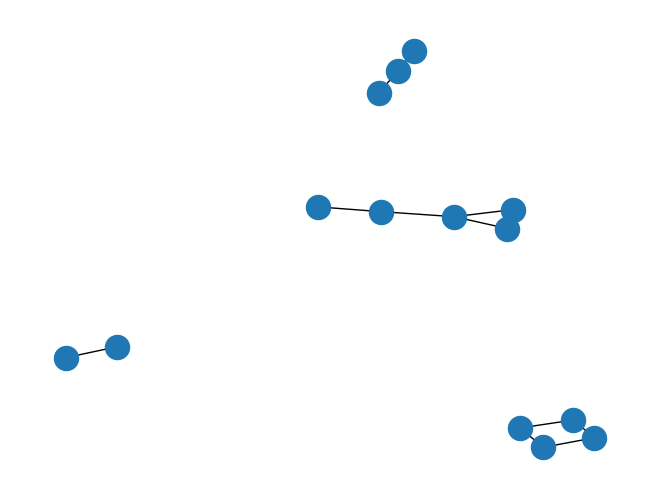

In [9]:
# Ein- und Ausgabe
# 1) Edge list Format
G.save_graph_as_edge_list("test")

with open("test.txt") as file:
    for line in file:
        print(line, end="")
        
newG = Graph("test.txt")
draw_graph(newG)

16 12
1
0
3
2 4
3 5 6
4 6
4 5
8 9
7
7

12 14
11 13
12 14
11 13


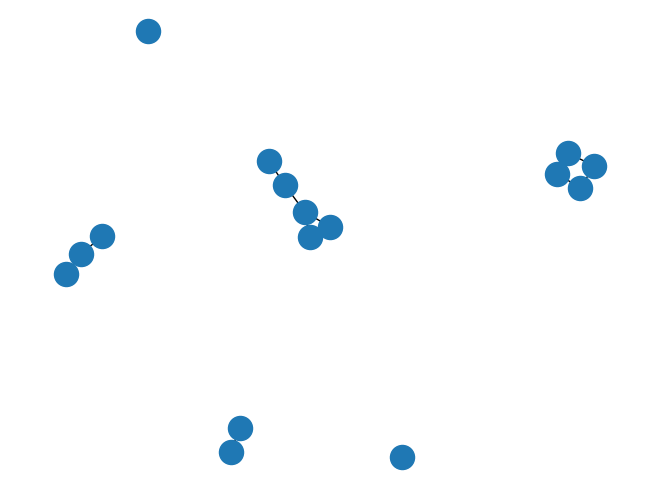

In [10]:
# 2) Edge list Format
G.save_graph_metis("test")

with open("test.txt") as file:
    for line in file:
        print(line, end="")
        
newG = Graph("test.txt", Graph.READ_MOD_METIS)
draw_graph(newG)

In [13]:
# kürzeste Pfade
# 1) single-source-shortest-path
print(sp.single_source_shortest_path(G, "1"))

{'-1': inf, '0': inf, '1': 0, '2': 1, '3': 2, '4': 3, '5': 3, '6': inf, '7': inf, '8': inf, '9': inf, '10': inf, '11': inf, '12': inf, '13': inf, '15': inf}


In [14]:
# 2) all-pairs-shortest-path
d = sp.all_pair_shortest_path(G)
for key in d:
    print(d[key])

{'-1': 0, '0': 1, '1': inf, '2': inf, '3': inf, '4': inf, '5': inf, '6': inf, '7': inf, '8': inf, '9': inf, '10': inf, '11': inf, '12': inf, '13': inf, '15': inf}
{'-1': 1, '0': 0, '1': inf, '2': inf, '3': inf, '4': inf, '5': inf, '6': inf, '7': inf, '8': inf, '9': inf, '10': inf, '11': inf, '12': inf, '13': inf, '15': inf}
{'-1': inf, '0': inf, '1': 0, '2': 1, '3': 2, '4': 3, '5': 3, '6': inf, '7': inf, '8': inf, '9': inf, '10': inf, '11': inf, '12': inf, '13': inf, '15': inf}
{'-1': inf, '0': inf, '1': 1, '2': 0, '3': 1, '4': 2, '5': 2, '6': inf, '7': inf, '8': inf, '9': inf, '10': inf, '11': inf, '12': inf, '13': inf, '15': inf}
{'-1': inf, '0': inf, '1': 2, '2': 1, '3': 0, '4': 1, '5': 1, '6': inf, '7': inf, '8': inf, '9': inf, '10': inf, '11': inf, '12': inf, '13': inf, '15': inf}
{'-1': inf, '0': inf, '1': 3, '2': 2, '3': 1, '4': 0, '5': 1, '6': inf, '7': inf, '8': inf, '9': inf, '10': inf, '11': inf, '12': inf, '13': inf, '15': inf}
{'-1': inf, '0': inf, '1': 3, '2': 2, '3': 1, 

In [18]:
# 3) shortest s-t path
print(sp.shortest_s_t_path(G, "1", "4"))
print(sp.shortest_s_t_path(G, "1", "10"))
print(sp.shortest_s_t_path(G, "4", "1"))

(['1', '2', '3', '4'], 3)
([], inf)
(['4', '3', '2', '1'], 3)


In [19]:
# 4) Zusammenhangskomponenten
print(sp.connected_components(G))

[{'0', '-1'}, {'1', '3', '4', '5', '2'}, {'8', '6', '7'}, {'9'}, {'13', '10', '11', '12'}, {'15'}]
